<a href="https://colab.research.google.com/github/ustab/NFL/blob/main/DVwPy_EDA_Project(Analyze_US_Citizens)_F_1218_BUSTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

1.Try to understand what the data looks like

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PROJECTS/EDA_1/adult_eda.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
df.rename(columns = {"age":"age","workclass":"wclss","fnlwgt":"fnlwgt", "education":"edu", "education-num":"edu_n",  "marital-status": "m_stts",  "occupation":"occu","capital-gain":"c_gain","relationship":"rshp","race":"race","sex":"sx", "capital-loss":"c_loss", "hours-per-week":"h_p_wk", "native-country":"n_cntry", "salary":"slry"})

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000,32561.000,31759.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.083,1077.649,87.304,40.437
std,13.640,105549.978,2.576,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [ ]:
df.duplicated().sum()
df

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
df.describe(include=[np.object])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
df.describe(include=[np.number])#just numeric values

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000,32561.000,31759.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.083,1077.649,87.304,40.437
std,13.640,105549.978,2.576,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [ ]:
df.describe(exclude=[np.number])#exclude numeric columns

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
df[df['age'].isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [ ]:
df[df.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12,23,Private,122272,Bachelors,13.000,Never-married,Adm-clerical,NaN,White,Female,0,0,30,United-States,<=50K
14,40,Private,121772,Assoc-voc,NaN,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
16,25,Self-emp-not-inc,176756,HS-grad,9.000,Never-married,Farming-fishing,NaN,White,Male,0,0,35,United-States,<=50K
26,19,Private,168294,HS-grad,9.000,Never-married,Craft-repair,NaN,White,Male,0,0,40,United-States,<=50K
31,20,Private,266015,Some-college,10.000,Never-married,Sales,NaN,Black,Male,0,0,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,22,Private,203715,Some-college,10.000,Never-married,Adm-clerical,NaN,White,Male,0,0,40,United-States,<=50K
32535,22,Private,325033,12th,8.000,Never-married,Protective-serv,NaN,Black,Male,0,0,35,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,45,State-gov,252208,HS-grad,9.000,Separated,Adm-clerical,NaN,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df[df.isnull().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12,23,Private,122272,Bachelors,13.000,Never-married,Adm-clerical,NaN,White,Female,0,0,30,United-States,<=50K
14,40,Private,121772,Assoc-voc,NaN,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
16,25,Self-emp-not-inc,176756,HS-grad,9.000,Never-married,Farming-fishing,NaN,White,Male,0,0,35,United-States,<=50K
26,19,Private,168294,HS-grad,9.000,Never-married,Craft-repair,NaN,White,Male,0,0,40,United-States,<=50K
31,20,Private,266015,Some-college,10.000,Never-married,Sales,NaN,Black,Male,0,0,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32527,22,Private,203715,Some-college,10.000,Never-married,Adm-clerical,NaN,White,Male,0,0,40,United-States,<=50K
32535,22,Private,325033,12th,8.000,Never-married,Protective-serv,NaN,Black,Male,0,0,35,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,45,State-gov,252208,HS-grad,9.000,Separated,Adm-clerical,NaN,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.isnull().sum().sum()

5870

Univariate & Multivariate Analysis

Rename the features of; "education-num", "marital-status", "capital-gain", "capital-loss", "hours-per-week", "native-country" as "education_num", "marital_status", "capital_gain", "capital_loss", "hours_per_week", "native_country", respectively and permanently.

In [498]:
df.rename(columns = {"age":"age","workclass":"wclss","fnlwgt":"fnlwgt", "education":"edu", "education-num":"edu_n",  "marital-status": "m_stts",  "occupation":"occu","capital-gain":"c_gain","relationship":"rshp","race":"race","sex":"sx", "capital-loss":"c_loss", "hours-per-week":"h_p_wk", "native-country":"n_cntry", "salary":"slry"})

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K


In [499]:
df.columns

Index(['age', 'wclss', 'fnlwgt', 'edu', 'edu_n', 'm_stts', 'occu', 'rshp',
       'race', 'sx', 'c_gain', 'c_loss', 'h_p_wk', 'n_cntry', 'slry'],
      dtype='object')

In [500]:
df.head()

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [502]:
df.describe(include="object")

,wclss,edu,m_stts,occu,rshp,race,sx,n_cntry,slry
count,32551,32551,32551,32551,32551,32551,32551,32551,32551
unique,9,16,7,15,4,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22689,10499,14972,4136,13189,27806,21780,29161,24713


In [503]:
df["wclss"].value_counts()

Private             22689
Self-emp-not-inc     2541
Local-gov            2092
UNKNOWN              1835
State-gov            1298
Self-emp-inc         1115
Federal-gov           960
Without-pay            14
Never-worked            7
Name: wclss, dtype: int64

In [511]:
df[df.isin(["?"])].any()

age        False
wclss      False
fnlwgt     False
edu        False
edu_n      False
m_stts     False
occu       False
rshp       False
race       False
sx         False
c_gain     False
c_loss     False
h_p_wk     False
n_cntry    False
slry       False
dtype: bool

In [513]:
df[df.wclss=="?"]

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry


In [512]:
df["wclss"].value_counts()

Private             22689
Self-emp-not-inc     2541
Local-gov            2092
UNKNOWN              1835
State-gov            1298
Self-emp-inc         1115
Federal-gov           960
Without-pay            14
Never-worked            7
Name: wclss, dtype: int64

In [515]:
df=df.replace({"P":"UNKNOWN"})
df

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K


In [516]:
df.edu

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: edu, Length: 32551, dtype: object

In [518]:
df["edu_n"]

0       13.000
1       13.000
2        9.000
3        7.000
4       13.000
         ...  
32556   12.000
32557    9.000
32558    9.000
32559    9.000
32560    9.000
Name: edu_n, Length: 32551, dtype: float64

In [519]:
df.groupby("edu")["edu_n"].value_counts()

edu           edu_n 
10th          6.000       916
11th          7.000      1146
12th          8.000       424
1st-4th       2.000       161
5th-6th       3.000       330
7th-8th       4.000       630
9th           5.000       503
Assoc-acdm    12.000     1044
Assoc-voc     11.000     1343
Bachelors     13.000     5245
Doctorate     16.000      405
HS-grad       9.000     10213
Masters       14.000     1684
Preschool     1.000        50
Prof-school   15.000      558
Some-college  10.000     7097
Name: edu_n, dtype: int64

In [520]:
df["edu_n"].value_counts()

9.000     10213
10.000     7097
13.000     5245
14.000     1684
11.000     1343
7.000      1146
12.000     1044
6.000       916
4.000       630
15.000      558
5.000       503
8.000       424
16.000      405
3.000       330
2.000       161
1.000        50
Name: edu_n, dtype: int64

In [521]:
df.isnull().sum()

age          0
wclss        0
fnlwgt       0
edu          0
edu_n      802
m_stts       0
occu         0
rshp         0
race         0
sx           0
c_gain       0
c_loss       0
h_p_wk       0
n_cntry      0
slry         0
dtype: int64

In [ ]:
df["slry"].value_counts()

<=50K    24720
>50K      7841
Name: slry, dtype: int64

In [ ]:
df["edu"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: edu, dtype: int64

Check the sum of Missing Values per column

In [ ]:
df.isna().sum()

age           0
wclss         0
fnlwgt        0
edu           0
edu_n       802
m_stts        0
occu          0
rshp       5068
race          0
sx            0
c_gain        0
c_loss        0
h_p_wk        0
n_cntry       0
slry          0
dtype: int64

In [ ]:
df.isnull().sum()

age           0
wclss         0
fnlwgt        0
edu           0
edu_n       802
m_stts        0
occu          0
rshp       5068
race          0
sx            0
c_gain        0
c_loss        0
h_p_wk        0
n_cntry       0
slry          0
dtype: int64

In [ ]:
null_cols = df.columns[df.isnull().all()]
df.drop(null_cols, axis = 1, inplace = True)

In [ ]:
null_cols

Index([], dtype='object')

In [ ]:
df

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      32561 non-null  int64  
 1   wclss    32561 non-null  object 
 2   fnlwgt   32561 non-null  int64  
 3   edu      32561 non-null  object 
 4   edu_n    31759 non-null  float64
 5   m_stts   32561 non-null  object 
 6   occu     32561 non-null  object 
 7   rshp     27493 non-null  object 
 8   race     32561 non-null  object 
 9   sx       32561 non-null  object 
 10  c_gain   32561 non-null  int64  
 11  c_loss   32561 non-null  int64  
 12  h_p_wk   32561 non-null  int64  
 13  n_cntry  32561 non-null  object 
 14  slry     32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
percent_missing
missing_value_df.T

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
column_name,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
percent_missing,0.000,0.000,0.000,0.000,2.463,0.000,0.000,15.565,0.000,0.000,0.000,0.000,0.000,0.000,0.000


2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [ ]:
df.columns

Index(['age', 'wclss', 'fnlwgt', 'edu', 'edu_n', 'm_stts', 'occu', 'rshp',
       'race', 'sx', 'c_gain', 'c_loss', 'h_p_wk', 'n_cntry', 'slry'],
      dtype='object')

In [ ]:
#df.duplicated()
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [ ]:
df.drop_duplicates()

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.dropna()


,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10.000,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.head()

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.isnull().sum()

age           0
wclss         0
fnlwgt        0
edu           0
edu_n       802
m_stts        0
occu          0
rshp       5068
race          0
sx            0
c_gain        0
c_loss        0
h_p_wk        0
n_cntry       0
slry          0
dtype: int64

In [ ]:
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm

In [ ]:
df.head()

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.describe()

,age,fnlwgt,edu_n,c_gain,c_loss,h_p_wk
count,32561.000,32561.000,31759.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.083,1077.649,87.304,40.437
std,13.640,105549.978,2.576,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [ ]:
df.describe(include=['object'])

,wclss,edu,m_stts,occu,rshp,race,sx,n_cntry,slry
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Descriptive Statistics

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.000,38.582,13.640,17.000,28.000,37.000,48.000,90.000
fnlwgt,32561.000,189778.367,105549.978,12285.000,117827.000,178356.000,237051.000,1484705.000
edu_n,31759.000,10.083,2.576,1.000,9.000,10.000,12.000,16.000
c_gain,32561.000,1077.649,7385.292,0.000,0.000,0.000,0.000,99999.000
c_loss,32561.000,87.304,402.960,0.000,0.000,0.000,0.000,4356.000
h_p_wk,32561.000,40.437,12.347,1.000,40.000,40.000,45.000,99.000


In [ ]:
df.corr()

,age,fnlwgt,edu_n,c_gain,c_loss,h_p_wk
age,1.000,-0.077,0.036,0.078,0.058,0.069
fnlwgt,-0.077,1.000,-0.044,0.000,-0.010,-0.019
edu_n,0.036,-0.044,1.000,0.124,0.080,0.148
c_gain,0.078,0.000,0.124,1.000,-0.032,0.078
c_loss,0.058,-0.010,0.080,-0.032,1.000,0.054
h_p_wk,0.069,-0.019,0.148,0.078,0.054,1.000


In [529]:
df.corr('pearson').T

,age,fnlwgt,edu_n,c_gain,c_loss,h_p_wk
age,1.000,-0.076,0.035,0.077,0.057,0.067
fnlwgt,-0.076,1.000,-0.044,0.000,-0.010,-0.018
edu_n,0.035,-0.044,1.000,0.123,0.080,0.148
c_gain,0.077,0.000,0.123,1.000,-0.032,0.078
c_loss,0.057,-0.010,0.080,-0.032,1.000,0.054
h_p_wk,0.067,-0.018,0.148,0.078,0.054,1.000


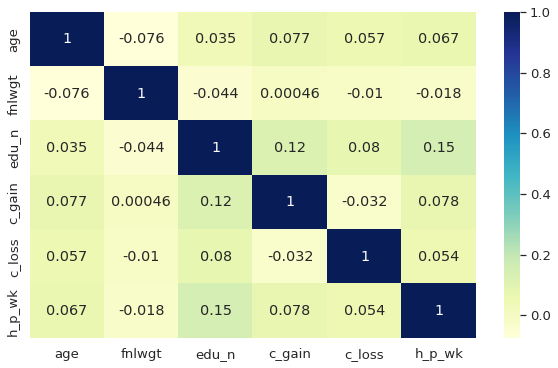

In [535]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [526]:
df_null=df.isnull().sum()

In [ ]:
df1 = df.dropna()
print(df1)

       age             wclss  fnlwgt           edu  edu_n              m_stts  \
0       39         State-gov   77516     Bachelors 13.000       Never-married   
1       50  Self-emp-not-inc   83311     Bachelors 13.000  Married-civ-spouse   
2       38           Private  215646       HS-grad  9.000            Divorced   
3       53           Private  234721          11th  7.000  Married-civ-spouse   
4       28           Private  338409     Bachelors 13.000  Married-civ-spouse   
...    ...               ...     ...           ...    ...                 ...   
32555   22           Private  310152  Some-college 10.000       Never-married   
32556   27           Private  257302    Assoc-acdm 12.000  Married-civ-spouse   
32557   40           Private  154374       HS-grad  9.000  Married-civ-spouse   
32558   58           Private  151910       HS-grad  9.000             Widowed   
32560   52      Self-emp-inc  287927       HS-grad  9.000  Married-civ-spouse   

                    occu   

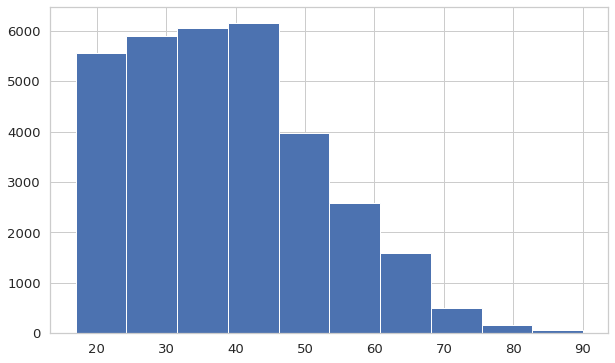

In [ ]:
plt.hist(df2['age']);

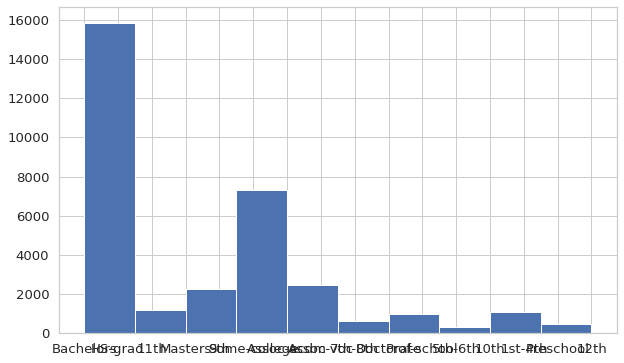

In [ ]:
plt.hist(df['edu']);

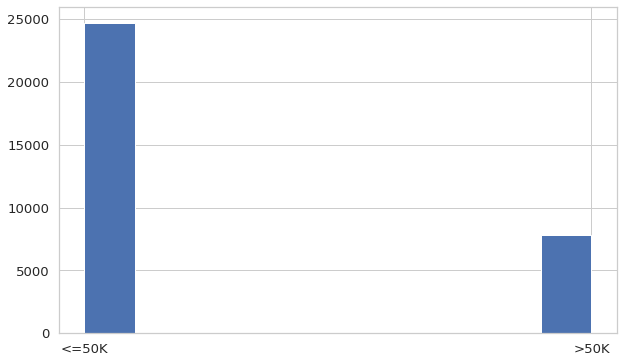

In [ ]:
plt.hist(df['slry']);

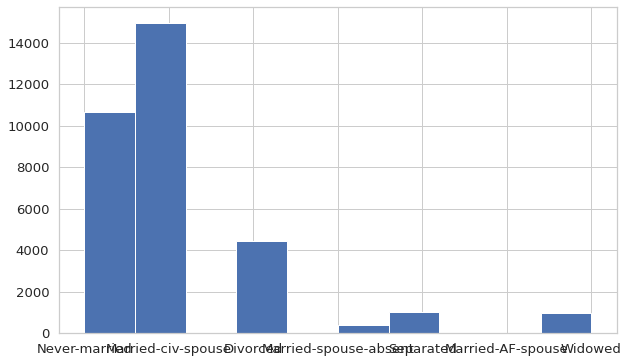

In [ ]:
plt.hist(df['m_stts']);

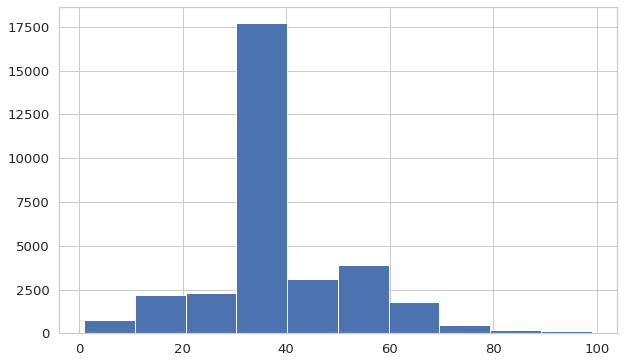

In [ ]:
plt.hist(df['h_p_wk']);

In [ ]:
df.isnull().sum()/len(df)*100

age        0.000
wclss      0.000
fnlwgt     0.000
edu        0.000
edu_n      2.463
m_stts     0.000
occu       0.000
rshp      15.565
race       0.000
sx         0.000
c_gain     0.000
c_loss     0.000
h_p_wk     0.000
n_cntry    0.000
slry       0.000
dtype: float64

In [ ]:
df.columns

Index(['age', 'wclss', 'fnlwgt', 'edu', 'edu_n', 'm_stts', 'occu', 'rshp',
       'race', 'sx', 'c_gain', 'c_loss', 'h_p_wk', 'n_cntry', 'slry'],
      dtype='object')

In [ ]:
df.columns[df.dtypes=="object"]

Index(['wclss', 'edu', 'm_stts', 'occu', 'rshp', 'race', 'sx', 'n_cntry',
       'slry'],
      dtype='object')

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
wclss,32561,9,Private,22696
edu,32561,16,HS-grad,10501
m_stts,32561,7,Married-civ-spouse,14976
occu,32561,15,Prof-specialty,4140
rshp,27493,5,Husband,13193
race,32561,5,White,27816
sx,32561,2,Male,21790
n_cntry,32561,42,United-States,29170
slry,32561,2,<=50K,24720


In [ ]:
col_object=df.columns[df.dtypes=="object"]
for col in col_object:
  print(col)
  print('--'*10)
  print(df[col].value_counts(dropna=False))
  print('##'*20)

wclss
--------------------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: wclss, dtype: int64
########################################
edu
--------------------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: edu, dtype: int64
########################################
m_stts
--------------------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spous

In [ ]:
(df2=="?").any(axis=0)

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

univariate and multivariate analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      32561 non-null  int64  
 1   wclss    32561 non-null  object 
 2   fnlwgt   32561 non-null  int64  
 3   edu      32561 non-null  object 
 4   edu_n    31759 non-null  float64
 5   m_stts   32561 non-null  object 
 6   occu     32561 non-null  object 
 7   rshp     27493 non-null  object 
 8   race     32561 non-null  object 
 9   sx       32561 non-null  object 
 10  c_gain   32561 non-null  int64  
 11  c_loss   32561 non-null  int64  
 12  h_p_wk   32561 non-null  int64  
 13  n_cntry  32561 non-null  object 
 14  slry     32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [ ]:
df.head()

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.slry.value_counts()

<=50K    24720
>50K      7841
Name: slry, dtype: int64

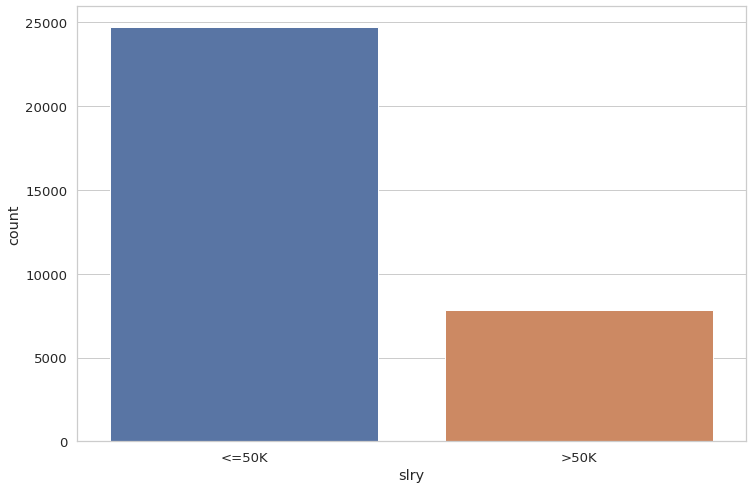

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x=df.slry)
#ax.bar_label(ax.containers[0])

In [ ]:
df.slry.value_counts(normalize=True)

<=50K   0.759
>50K    0.241
Name: slry, dtype: float64

coclusion about salary:

In [ ]:
#75.9% of the population have a salary less than 50K, but 24.1% of them have more than 50K.

numeric data

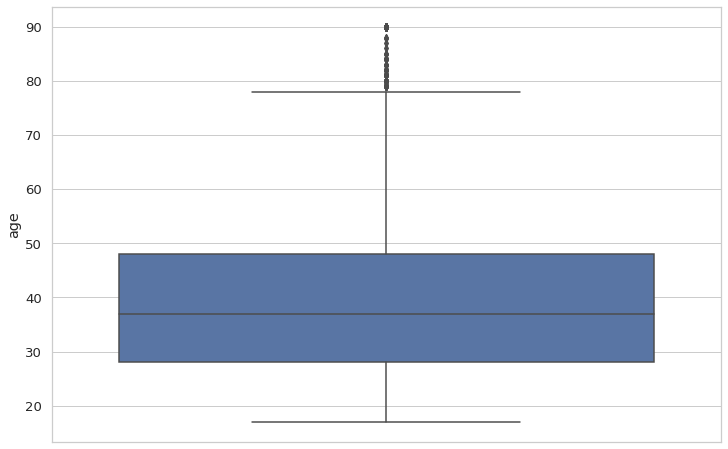

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y="age");

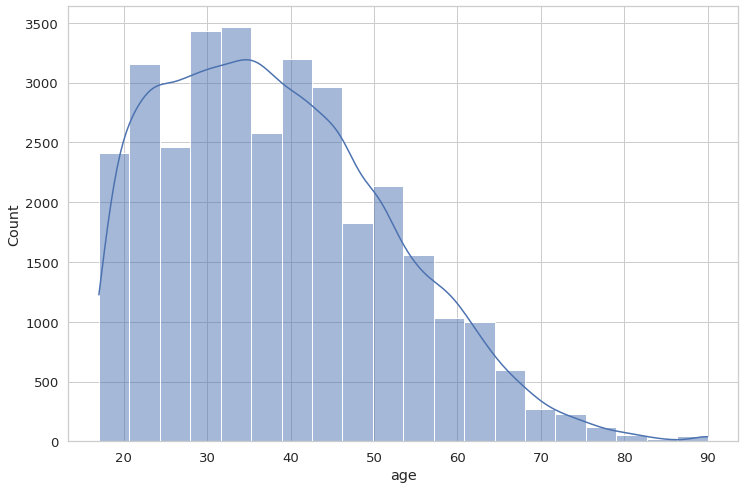

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", kde=True, bins=20);

In [ ]:
df.age.describe()

count   32561.000
mean       38.582
std        13.640
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

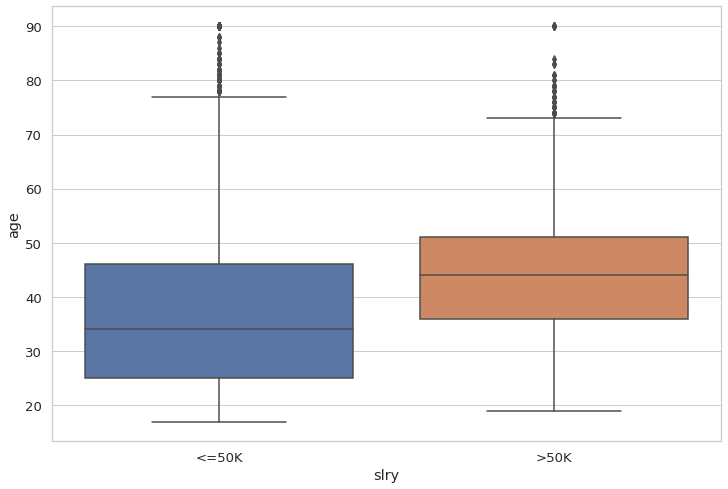

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="slry", y="age");

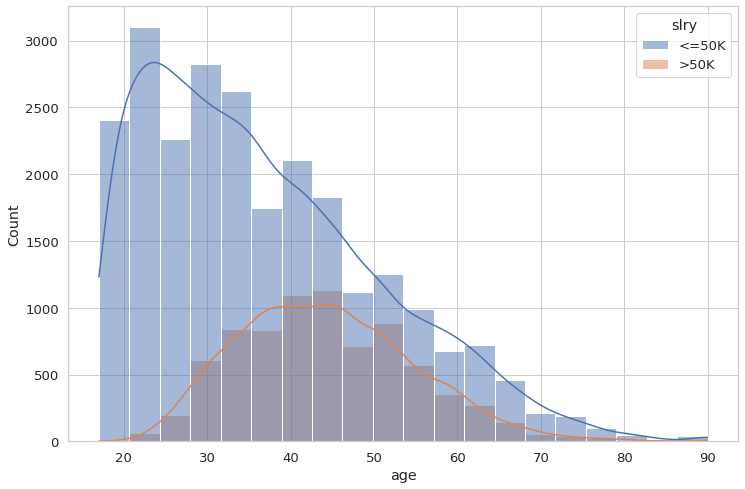

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age",hue="slry", kde=True, bins=20);

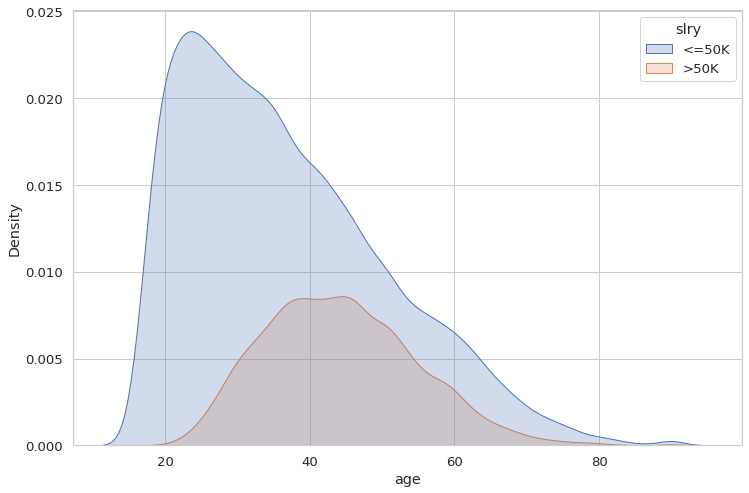

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.kdeplot(data=df, x="age",hue="slry", shade=True);

In [ ]:
df.groupby("slry").age.describe()

,count,mean,std,min,25%,50%,75%,max
slry,,,,,,,,
<=50K,24720.000,36.784,14.020,17.000,25.000,34.000,46.000,90.000
>50K,7841.000,44.250,10.519,19.000,36.000,44.000,51.000,90.000


conclusion(age feature by salary levels)
median=37,average of age=38.5

In [ ]:
#Mean and Median values(people having salary > 50K) are more than the others.
#Distribution of age is right skewed.
#At the other group(having <=50K), distribution is normal 


fnlwgt and salary

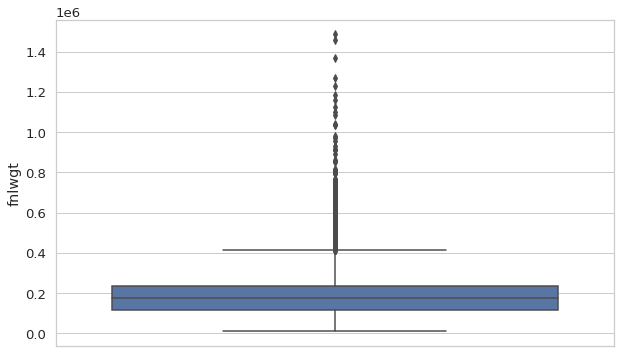

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.boxplot(data=df, y="fnlwgt");

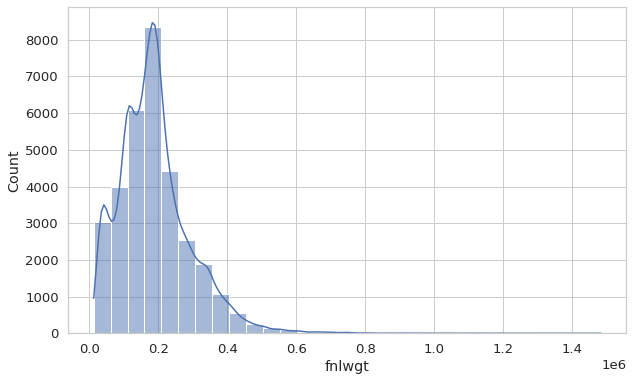

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.histplot(data=df, x="fnlwgt", kde=True, bins=30);

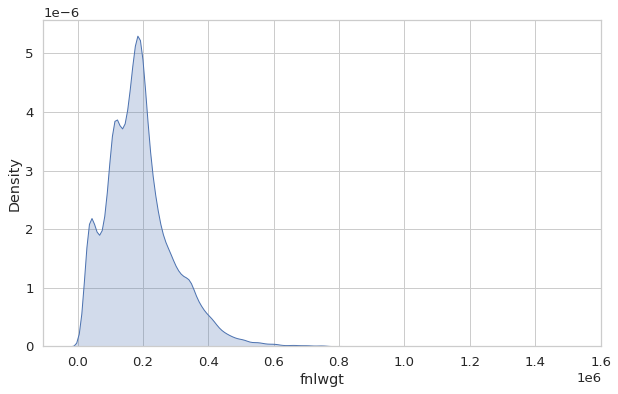

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.kdeplot(data=df, x="fnlwgt", shade=True);

In [ ]:
df.fnlwgt.describe()

count     32561.000
mean     189778.367
std      105549.978
min       12285.000
25%      117827.000
50%      178356.000
75%      237051.000
max     1484705.000
Name: fnlwgt, dtype: float64

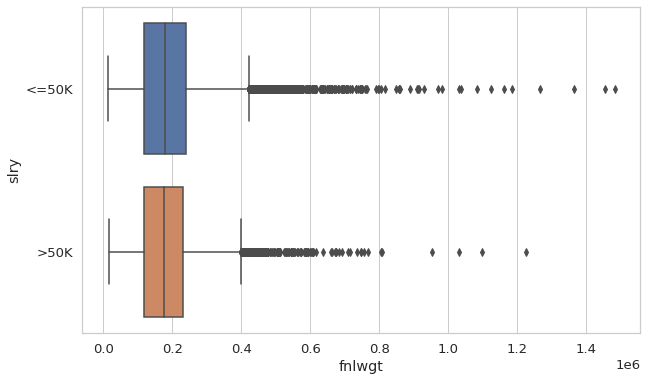

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.boxplot(data=df, y="slry",x="fnlwgt");

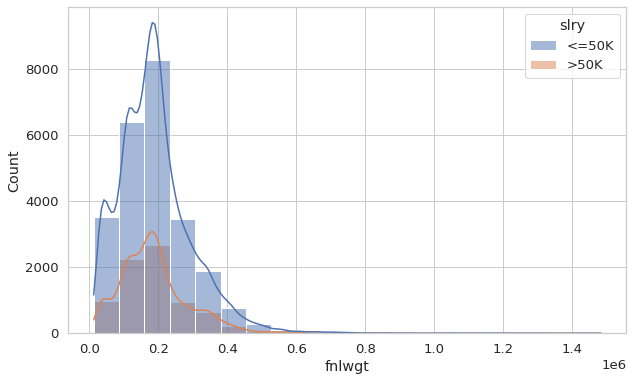

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.histplot(data=df, x="fnlwgt",hue="slry", kde=True, bins=20);

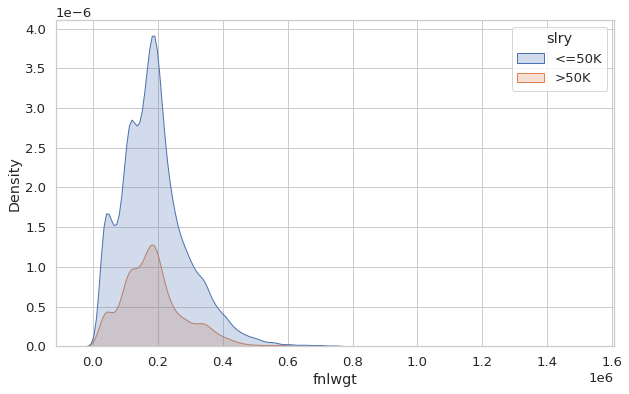

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.kdeplot(data=df, x="fnlwgt", hue="slry", shade=True);

In [ ]:
df.groupby("slry").fnlwgt.describe()

,count,mean,std,min,25%,50%,75%,max
slry,,,,,,,,
<=50K,24720.000,190340.865,106482.271,12285.000,117606.000,179465.000,239023.000,1484705.000
>50K,7841.000,188005.000,102541.775,14878.000,119101.000,176101.000,230959.000,1226583.000


conclusion(fnlwgt):
fnlwgt by salary(mean, median):almost same but fnlwgt skewed positively.

education_num and salary

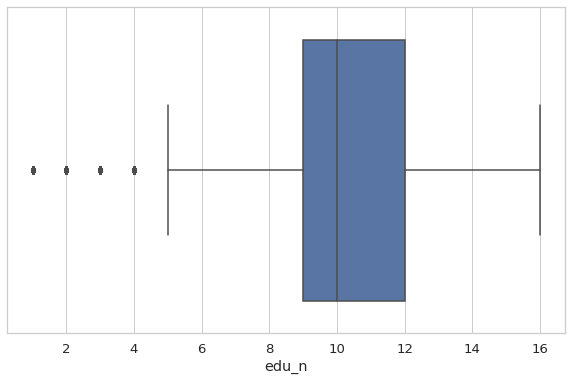

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.boxplot(data=df,  x="edu_n");

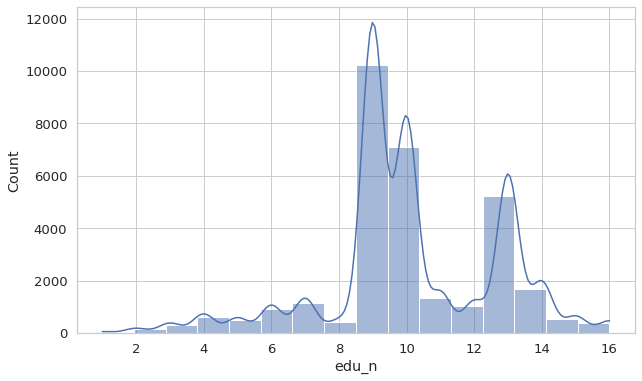

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.histplot(data=df, x="edu_n", kde=True, bins=16);

In [ ]:
df.edu_n.describe()

count   31759.000
mean       10.083
std         2.576
min         1.000
25%         9.000
50%        10.000
75%        12.000
max        16.000
Name: edu_n, dtype: float64

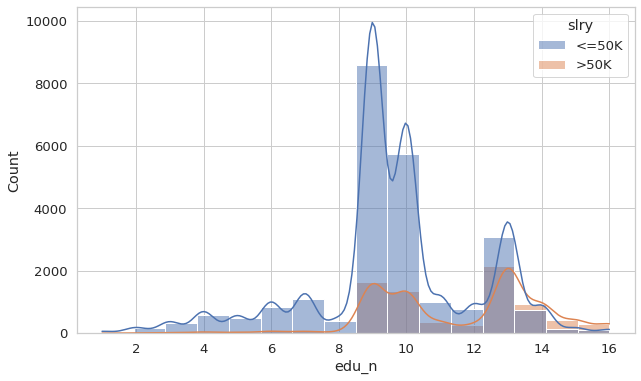

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.histplot(data=df, x="edu_n", hue="slry", bins=16, kde=True);

In [ ]:
df.groupby("slry").edu.describe()

,count,unique,top,freq
slry,,,,
<=50K,24720,16,HS-grad,8826
>50K,7841,15,Bachelors,2221


education level and salary have positive correlation

capital gain and salary

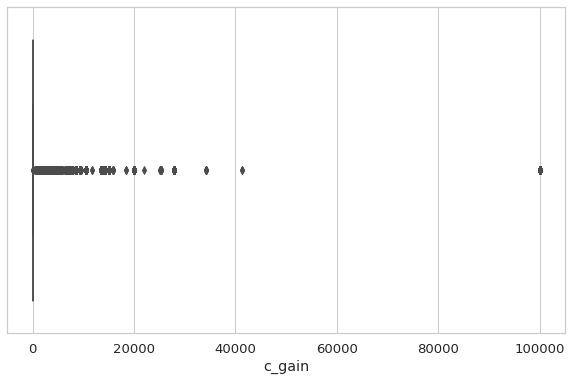

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.boxplot(data=df, x="c_gain");


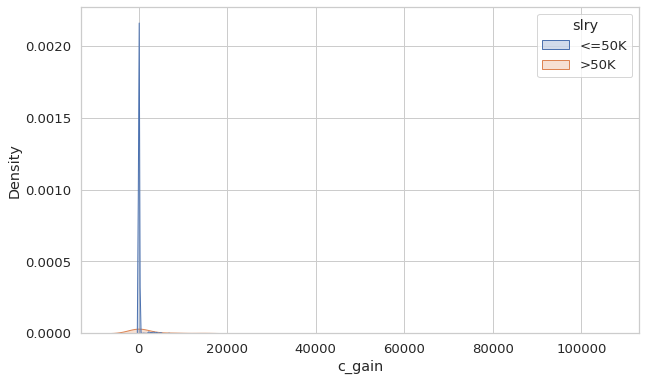

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.kdeplot(data=df, x="c_gain", hue="slry", shade=True);

In [ ]:
df.c_gain.describe()

count   32561.000
mean     1077.649
std      7385.292
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     99999.000
Name: c_gain, dtype: float64

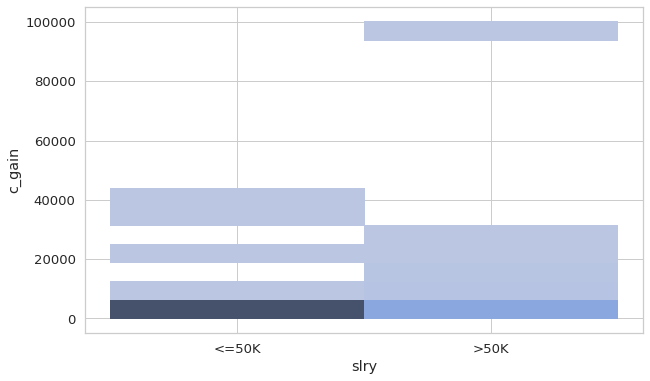

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.histplot(data=df, x="slry", y="c_gain");

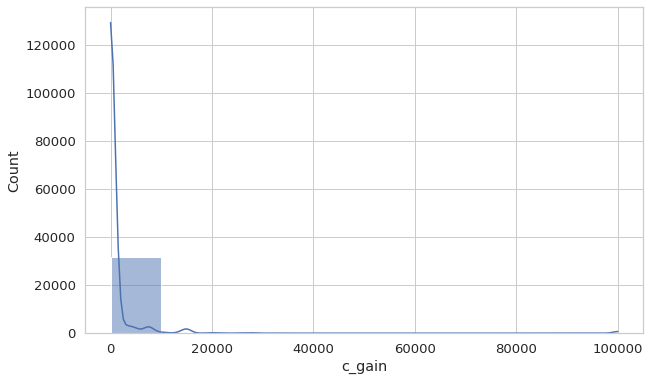

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.histplot(data=df, x="c_gain", bins=10, kde=True);

conclusion(c_gain):distributed between 0-10000

In [ ]:
df["edu"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: edu, dtype: int64

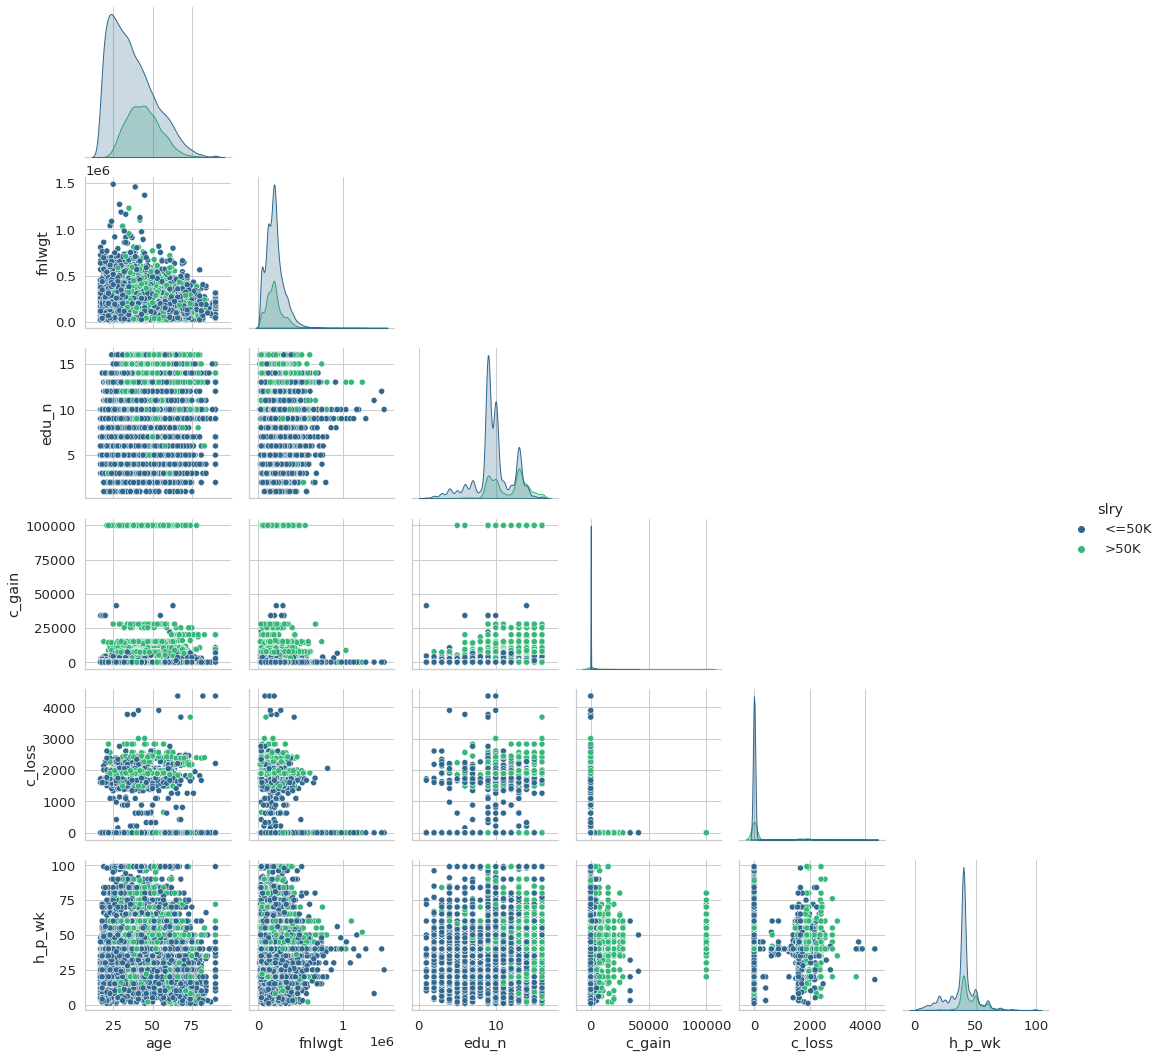

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.pairplot(data=df, hue="slry", corner=True, palette="viridis");

categoric data

In [ ]:
df.edu_n.value_counts(dropna=False)

9.000     10215
10.000     7098
13.000     5247
14.000     1687
11.000     1343
7.000      1146
12.000     1044
6.000       916
NaN         802
4.000       631
15.000      559
5.000       503
8.000       424
16.000      405
3.000       330
2.000       161
1.000        50
Name: edu_n, dtype: int64

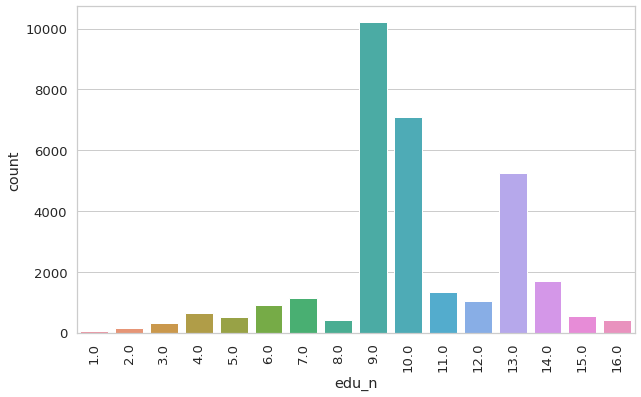

In [ ]:
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
sns.countplot(data=df, x="edu_n");
plt.xticks(rotation=90);

In [ ]:
df["edu"].value_counts()



HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: edu, dtype: int64

In [ ]:
higher_edu = df.edu.isin(["Bachelors", "Masters", "Doctorate"])
higher_edu

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: edu, Length: 32561, dtype: bool

In [ ]:
df.loc[(df["edu"]!="Bachelors")]

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14.000,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5.000,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [ ]:
df["m_stts"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: m_stts, dtype: int64

In [ ]:
df["rshp"].value_counts()

Husband           13193
Not-in-family      8305
Unmarried          3446
Wife               1568
Other-relative      981
Name: rshp, dtype: int64

In [ ]:
df["wclss"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: wclss, dtype: int64

In [ ]:
df["occu"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occu, dtype: int64

In [ ]:
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
country_slry_df = df.groupby("n_cntry")[["slry"]].count()
country_slry_df.T

n_cntry,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
slry,583,19,121,75,59,95,70,28,106,90,29,137,29,64,44,1,13,20,13,100,43,24,73,81,62,18,643,34,14,31,198,60,37,114,12,80,51,18,19,29170,67,16


In [ ]:
df.groupby("edu")["edu"].count()

edu
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
Name: edu, dtype: int64

In [ ]:
df["edu"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: edu, dtype: int64

Other Specific Analysis Questions

What is the average age of males and females by income level?

In [ ]:
country_slry_df = df.groupby("n_cntry")[["slry"]].count()
country_slry_df


,slry
n_cntry,
?,583
Cambodia,19
Canada,121
China,75
Columbia,59
Cuba,95
Dominican-Republic,70
Ecuador,28
El-Salvador,106


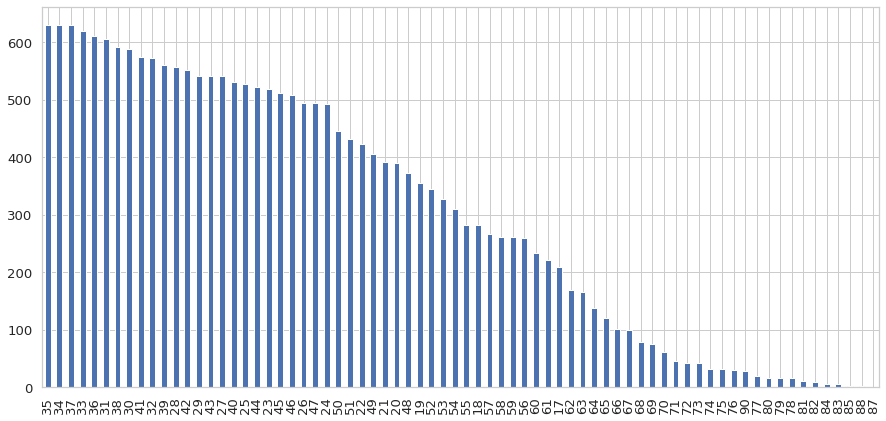

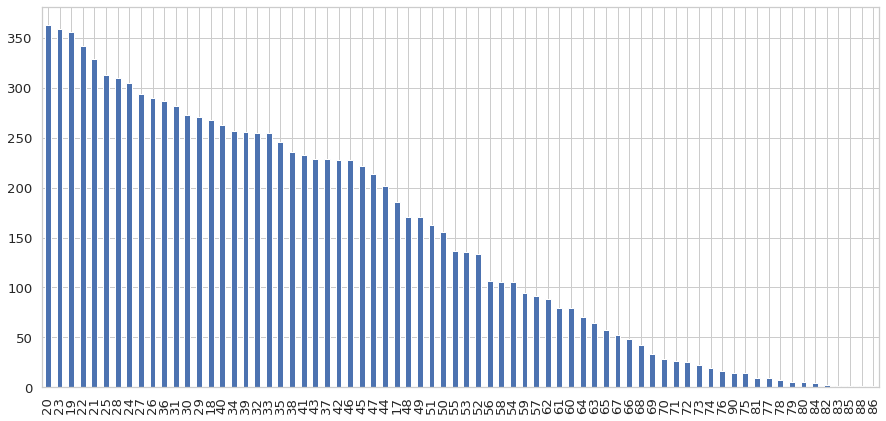

In [ ]:
cntry_slry_df_riches = df[df.slry == '>50K'].groupby("n_cntry")[["slry"]].count()
cntry_slry_df_riches
df["occu"].value_counts()
df["h_p_wk"].value_counts()
average_age_men = round(df[df.sx == "Male"]["age"].mean())
average_age_men
df["slry"].value_counts()
df["edu"].value_counts()
plt.figure(figsize = (15,7))
df.loc[df["sx"] == "Male", "age"].value_counts().plot.bar();
average_age_women = round(df[df.sx == "Female"]["age"].mean())
average_age_women
plt.figure(figsize = (15,7))
df.loc[df["sx"] == "Female", "age"].value_counts().plot.bar();


What is the workclass percentages of Americans in high-level income group?

In [ ]:
df["wclss"].value_counts()
df=df.replace({'?':'UNKNOWN'})
df
df["edu_n"]
df.groupby('edu')['edu_n'].value_counts()
df["edu_n"].value_counts()
df.edu.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: edu, dtype: int64

In [ ]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)
IQR = Q3 - Q1
IQR

upper_lim = Q3 + (IQR*1.5) 
upper_lim

20.0

In [ ]:
upper_lim = Q3 + (IQR*1.5) 
upper_lim

78.0

In [ ]:
df[df["age"] >= 78 ]["age"].value_counts()

90    43
78    23
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

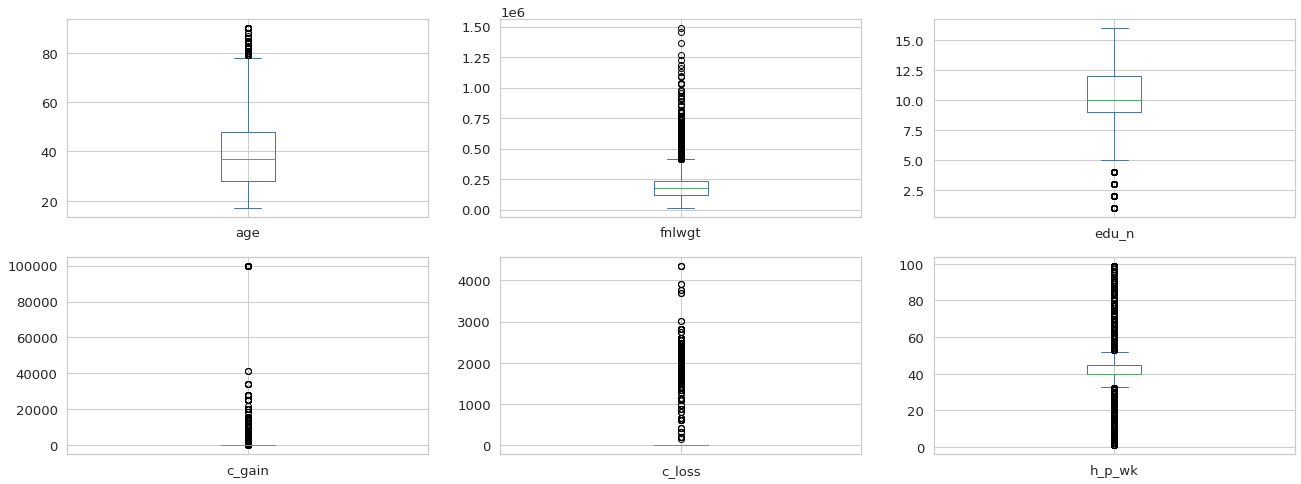

In [ ]:
fig ,ax = plt.subplots(2,3,figsize=(22,8))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [ ]:
df[(df["h_p_wk"] == 99)].sample(10)

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
10143,35,UNKNOWN,164866,10th,6.000,Divorced,UNKNOWN,Not-in-family,White,Male,0,0,99,United-States,<=50K
935,37,Private,176900,HS-grad,9.000,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
6618,27,Private,336951,HS-grad,9.000,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,<=50K
32531,30,UNKNOWN,33811,Bachelors,13.000,Never-married,UNKNOWN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
18881,43,Private,249771,HS-grad,9.000,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,99,United-States,<=50K
30036,40,Private,25005,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,99,United-States,>50K
4086,50,UNKNOWN,174964,10th,6.000,Married-civ-spouse,UNKNOWN,Husband,White,Male,0,0,99,United-States,<=50K
22216,45,Private,54260,Some-college,10.000,Divorced,Craft-repair,Unmarried,White,Male,0,0,99,United-States,<=50K
26858,66,Private,262285,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,<=50K
22313,26,Self-emp-not-inc,258306,10th,6.000,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K


In [ ]:
Q1_hpw = df["h_p_wk"].quantile(0.25)
Q3_hpw = df["h_p_wk"].quantile(0.75)
IQR_hpw = Q3_hpw - Q1_hpw
IQR_hpw

5.0

In [ ]:
upper_lim_hpw = Q3_hpw + (IQR_hpw * 1.5) 
upper_lim_hpw

52.5

In [478]:
df[(df['age']>=upper_lim_hpw)]

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
21,54,Private,302146,HS-grad,9.000,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9.000,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
25,56,Local-gov,216851,Bachelors,13.000,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
27,54,UNKNOWN,180211,Some-college,10.000,Married-civ-spouse,UNKNOWN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,UNKNOWN,287372,Doctorate,NaN,Married-civ-spouse,UNKNOWN,Husband,White,Male,0,0,10,United-States,>50K
32542,72,UNKNOWN,129912,HS-grad,9.000,Married-civ-spouse,UNKNOWN,Husband,White,Male,0,0,25,United-States,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15.000,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32554,53,Private,321865,Masters,14.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [482]:
df[(df['h_p_wk']>= upper_lim_hpw)]

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
10,37,Private,280464,Some-college,10.000,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
20,40,Private,193524,Doctorate,16.000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
27,54,UNKNOWN,180211,Some-college,10.000,Married-civ-spouse,UNKNOWN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9.000,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
52,47,Private,51835,Prof-school,15.000,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,UNKNOWN,320084,Bachelors,13.000,Married-civ-spouse,UNKNOWN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,UNKNOWN,33811,Bachelors,13.000,Never-married,UNKNOWN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32532,34,Private,204461,Doctorate,16.000,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
32536,34,Private,160216,Bachelors,13.000,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K


In [492]:
drop_index=df.index[(df['h_p_wk']>=upper_lim_hpw) & (df['age'] >=upper_lim)]
drop_index

Int64Index([], dtype='int64')

In [493]:
df1=df.drop(drop_index)
df1

,age,wclss,fnlwgt,edu,edu_n,m_stts,occu,rshp,race,sx,c_gain,c_loss,h_p_wk,n_cntry,slry
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [494]:
df["rshp"].value_counts(dropna=False)

Husband           13189
Not-in-family      8301
NaN                5068
Unmarried          3444
Wife               1568
Other-relative      981
Name: rshp, dtype: int64

In [495]:
df["rshp"]=df["rshp"].str.replace("not-in-family", "Unmarried").str.replace("Other-relative","Unmarried").fillna("Unmarried")

In [496]:
df.rshp.value_counts()

Husband          13189
Unmarried         9493
Not-in-family     8301
Wife              1568
Name: rshp, dtype: int64

In [491]:
race_count = df.race.value_counts()
race_count

White                 27806
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

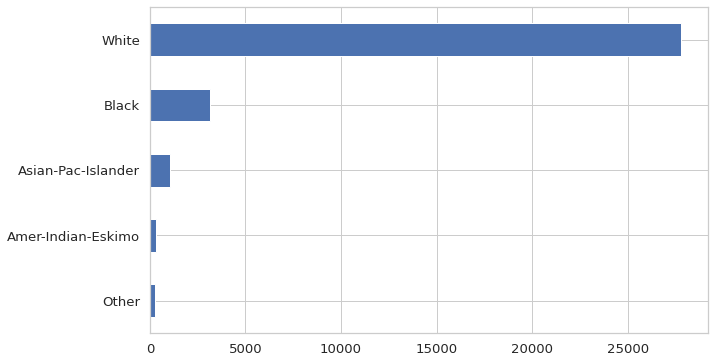

In [497]:
race_count.sort_values().plot.barh();